![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Redes Neuronales

En este taller podrán poner en práctica sus conocimientos sobre la construcción e implementación de redes neuronales de una capa y multicapa. El taller está constituido por 4 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción probabilidad de admisión a la universidad

En este taller se usará el conjunto de datos de admisiones a una universidad proveniente de la base de datos de Kaggle. Cada observación contiene la probabilidad de que un estudiante sea admitido por la universidad, dadas distintas variables predictoras como el puntaje del examén TOEFL y GRE, el promedio (GPA), entre otras. El objetivo es predecir la probabilidad de admissión de cada estudiante. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/mohansacharya/graduate-admissions).

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install livelossplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Importación librerías
import numpy as np
import keras 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from keras import initializers
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

# Importación librerías
from keras.models import Sequential
from keras.layers import Dense, Activation
from livelossplot import PlotLossesKeras
from keras import backend as K
import keras.optimizers as opts

In [ ]:
# Carga de datos de archivo .csv
data = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/universityGraduateAdmissions.csv', index_col=0)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
data.shape

(500, 8)

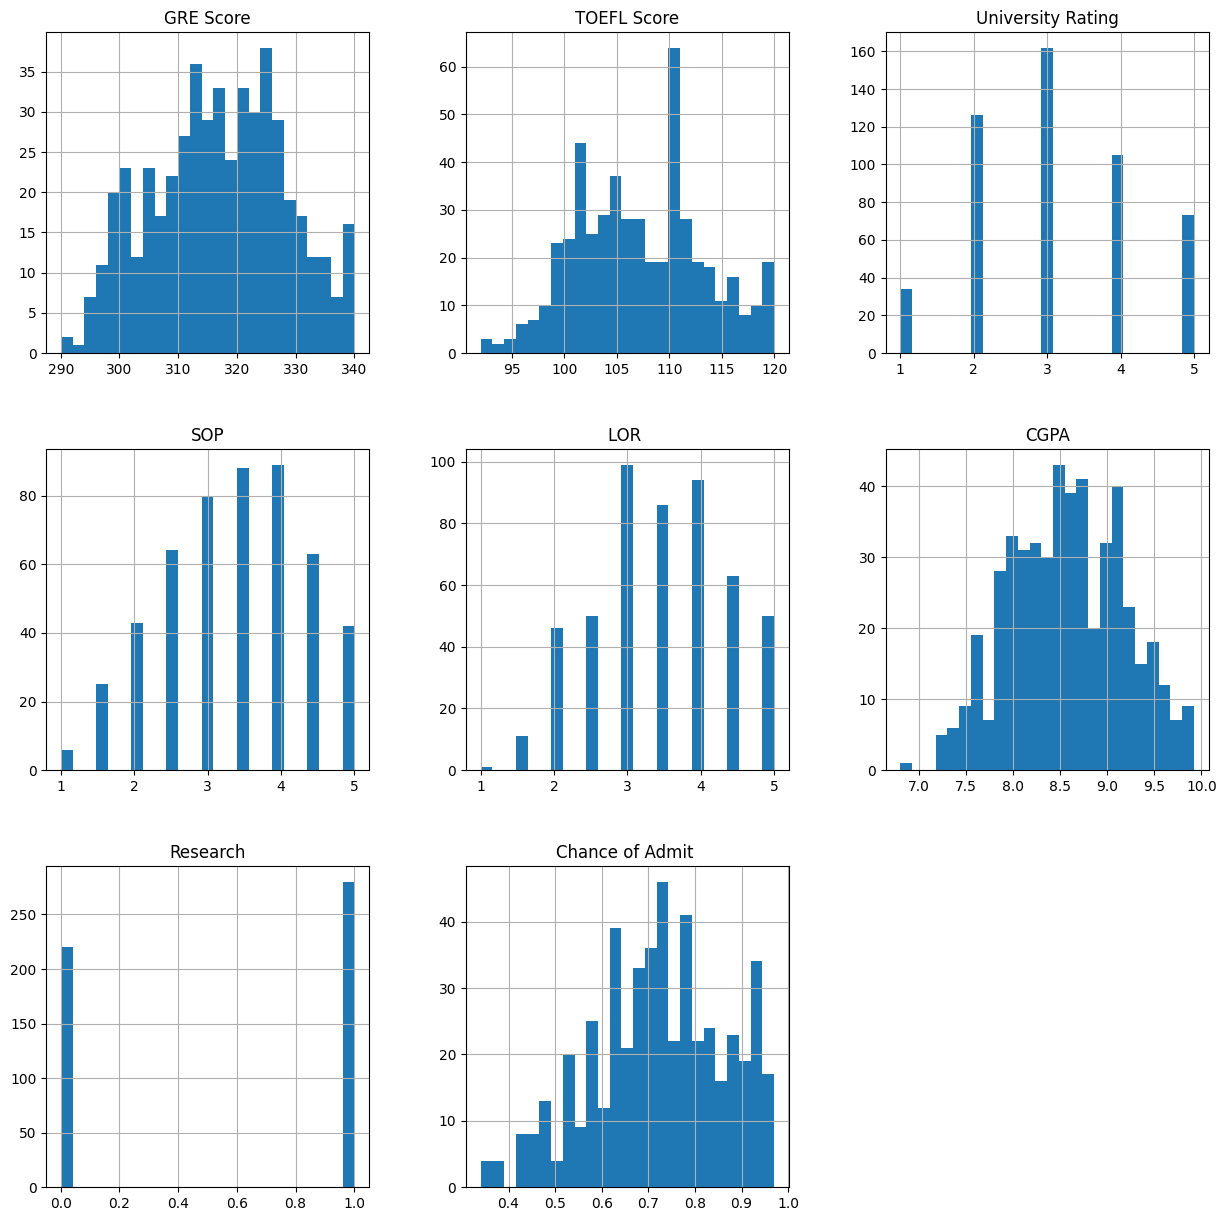

In [ ]:
# Hitogramas de las varaibles del dataset
data.hist(bins=25, figsize=(15,15))
plt.show()

In [ ]:
# Definición de variables predictoras (X)
X = data.drop(data.columns[-1], axis=1)
# Definición de variable de interés (y)
Y = data[data.columns[-1]]

In [ ]:
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
Serial No.,,,,,,,
1,337,118,4,4.5,4.5,9.65,1
2,324,107,4,4.0,4.5,8.87,1
3,316,104,3,3.0,3.5,8.00,1
4,322,110,3,3.5,2.5,8.67,1
5,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
496,332,108,5,4.5,4.0,9.02,1
497,337,117,5,5.0,5.0,9.87,1
498,330,120,5,4.5,5.0,9.56,1


In [ ]:
Y

Serial No.
1      0.92
2      0.76
3      0.72
4      0.80
5      0.65
       ... 
496    0.87
497    0.96
498    0.93
499    0.73
500    0.84
Name: Chance of Admit , Length: 500, dtype: float64

In [ ]:
# Separación de variables predictoras (X) y variable de interés (y) en set de entrenamiento y test usandola función train_test_split
X_train, X_test , Y_train, Y_test = train_test_split(X,Y, test_size=0.3 ,random_state=22)

In [ ]:
#Para comparar las métricas de cada modelo
MAE = {}
MSE = {}

## Punto 1 - Red Neuronal de una capa

En la celda 1 creen una **red neuronal de una capa** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes, usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador y el número de épocas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

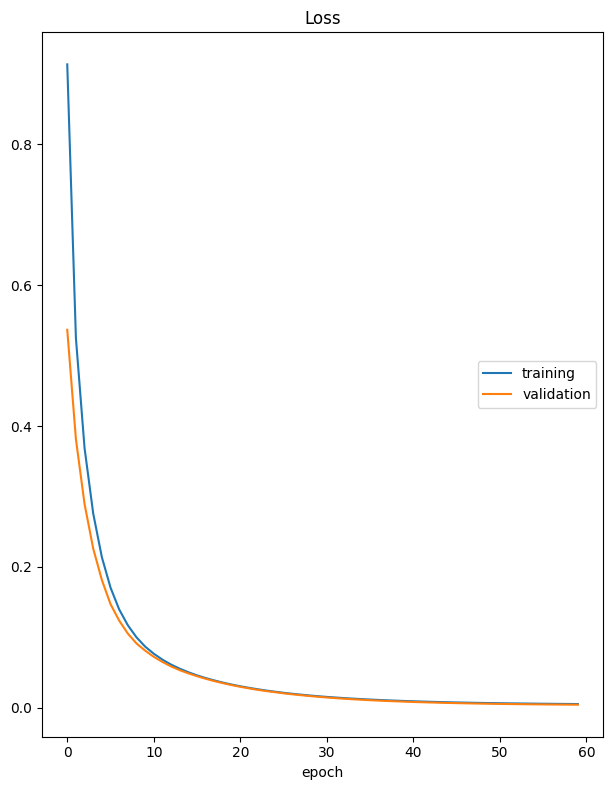

Loss
	training         	 (min:    0.005, max:    0.914, cur:    0.005)
	validation       	 (min:    0.004, max:    0.537, cur:    0.004)
11/11 [==============================] - 0s 37ms/step - loss: 0.0050 - val_loss: 0.0041


In [ ]:
# Celda 1

# Normalización de variables predictoras (X) con la función StandardScaler
from sklearn.preprocessing import StandardScaler

# Definición de la función StandardScaler
scaler = StandardScaler()
scaler.fit(X)

# Transformación de los set de entrenamiento y test
X_train = pd.DataFrame(data=scaler.transform(X_train), columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(data=scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

X_train = np.array(X_train)
Y_train = np.array(Y_train)

X_test = np.array(X_test)
Y_test = np.array(Y_test)

# Definición de dimensiones de salida, variables de interés
output_var = Y_test.ndim

# Definición de dimensiones de entrada, varaibles predictoras
dims = X_train.shape[1]


############################ RED NEURONAL ###############################

K.clear_session()

# Definición red neuronal con la función Sequential()
model = Sequential()

# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model.add(Dense(output_var, input_shape=(dims,)))

# Definición de función de perdida
model.compile(optimizer='sgd', loss='mean_squared_error')

# Entrenamiento de la red neuronal con 60 épocas
model.fit(X_train, Y_train, 
          verbose=1, 
          epochs=60, 

          validation_data=(X_test, Y_test),
          callbacks=[PlotLossesKeras()])

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Obtener las predicciones del modelo para los datos de prueba
y_pred = model.predict(X_test)

# Calcular el MAE
mae = mean_absolute_error(Y_test, y_pred)

# Calcular el MSE
mse = mean_squared_error(Y_test, y_pred)

# Imprimir las métricas
print("Error absoluto medio (MAE):", mae)
MAE['mae_una_capa'] = mae

print("Error cuadrático medio (MSE):", mse)
MSE['mse_una_capa'] = mse


5/5 [==============================] - 0s 2ms/step
Error absoluto medio (MAE): 0.0498917359828949
Error cuadrático medio (MSE): 0.004069604917825254


#Observaciones


Se crero una red neuronal de una sola capa con: 

  - Función de pérdida 'mean_squared_error', teniendo en cuenta que es una métrica comúnmente utilizada para problemas de regresión.

  - Un optimizador SGD (Stochastic Gradient Descent), que es un método popular de optimización para el entrenamiento de redes neuronales.

  - El modelo se entrenará durante 60 épocas, ya que con este número de alcanza a evidenciar que tantos los datos de entrenamiento como de validación se alinean. 


En cuanto al desempeño de la red neuronal, se tiene un MSE de 0,043, un valor relatvamente alto (4 puntos), teniendo en cuenta que estamos prediciendo probabilidades. 
Sin embargo el modelo solo se va a equivocar en las predicción en un 0,0034. 


Se evaluarán los valores comprandolo con las redes del punto 2 y 3. 


## Punto 2 - Red Neuronal multicapa

En la celda 2 creen una **red neuronal con dos capas** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).






In [ ]:
# Celda 2
K.clear_session()

# Definición red neuronal con la función Sequential()
model = Sequential()

# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model.add(Dense(256, input_shape=(dims,),activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(output_var))
model.add(Activation('relu'))

# Impresión de la arquitectura de la red neuronal
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               2048      
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 1)                 257       
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 68,097
Trainable params: 68,097
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model.compile(optimizer='sgd', loss='mean_squared_error')

In [ ]:
# Separación de datos de entrenamiento para considerar un set de validación durante entrenamiento
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.15, random_state=42)

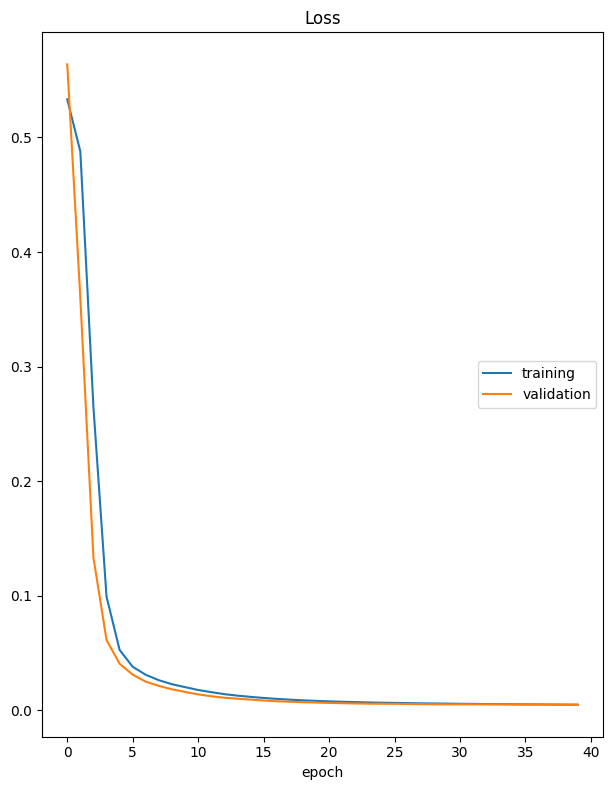

Loss
	training         	 (min:    0.005, max:    0.533, cur:    0.005)
	validation       	 (min:    0.005, max:    0.564, cur:    0.005)
10/10 [==============================] - 0s 45ms/step - loss: 0.0050 - val_loss: 0.0050


In [ ]:
#Entrenamiento de la red neuronal con 50 épocas
model.fit(X_train, Y_train,
          validation_data = (X_val, Y_val),
          epochs=40, 
          callbacks=[PlotLossesKeras()])

In [ ]:

# Obtener las predicciones del modelo para los datos de prueba
y_pred = model.predict(X_val)

# Calcular el MAE
mae = mean_absolute_error(Y_val, y_pred)

# Calcular el MSE
mse = mean_squared_error(Y_val, y_pred)

# Imprimir las métricas
print("Error absoluto medio (MAE):", mae)
MAE['mae_dos_capa'] = mae

print("Error cuadrático medio (MSE):", mse)
MSE['mse_dos_capa'] = mse


2/2 [==============================] - 0s 6ms/step
Error absoluto medio (MAE): 0.05018357375882706
Error cuadrático medio (MSE): 0.005004281151070586


En este punto se procedio a crear una red neuronal de dos capas: 
  - Se usa la función de pérdida 'mean_squared_error', teniendo en cuenta que es una métrica comúnmente utilizada para problemas de regresión y es la escogida para realizar las comparaciones dentro del taller.

  - Se usa un optimizador SGD (Stochastic Gradient Descent), ya que es ofrece eficiencia computacional, escalabilidad, evita mínimos locales subóptimos, mejora la generalización y se adapta bien a cambios en los datos, lo que lo convierte en una opción popular para entrenar redes neuronales de dos capas.

  - El modelo se entrenará durante 40 épocas, ya que con este número se alcanza a evidenciar que tantos los datos de entrenamiento como de validación se alinean. 

En cuanto al desempeño de la red neuronal, se tiene un MSE de 0.005, en terminos porcentuales del 0,5% lo cual se considero alto un valor relativamente bajo. En general, este modelo se desvia un 5% en promedio en las predicciones. 

En el punto 4 se realizará la comparación contra los otros modelos. 

#Observaciones

## Punto 3  - Red Neuronal multicapa

En la celda 3 creen **una red neuronal con más de una capa con la librería Keras, usando early stopping y dropout,** que prediga la probabilidad de admisión de los estudiantes con los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [ ]:
# Celda 3
from keras.callbacks import EarlyStopping

In [ ]:
#Definir el modelo de red neuronal

model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='relu'))

model.compile(loss='mean_squared_error', optimizer='ADAM', metrics=['mae', 'mse'])

In [ ]:
# Separación de datos de entrenamiento para considerar un set de validación durante entrenamiento
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.15, random_state=42)

In [ ]:
# Entrenar el modelo

early_stopping = EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(X_train, Y_train, epochs=60, batch_size=32, validation_data=(X_val, Y_val), callbacks=[early_stopping])

Epoch 1/60
8/8 [==============================] - 1s 30ms/step - loss: 0.2565 - mae: 0.4492 - mse: 0.2565 - val_loss: 0.0898 - val_mae: 0.2669 - val_mse: 0.0898
Epoch 2/60
8/8 [==============================] - 0s 9ms/step - loss: 0.1599 - mae: 0.3225 - mse: 0.1599 - val_loss: 0.0447 - val_mae: 0.1674 - val_mse: 0.0447
Epoch 3/60
8/8 [==============================] - 0s 6ms/step - loss: 0.1228 - mae: 0.2783 - mse: 0.1228 - val_loss: 0.0377 - val_mae: 0.1569 - val_mse: 0.0377
Epoch 4/60
8/8 [==============================] - 0s 7ms/step - loss: 0.1173 - mae: 0.2622 - mse: 0.1173 - val_loss: 0.0432 - val_mae: 0.1748 - val_mse: 0.0432
Epoch 5/60
8/8 [==============================] - 0s 6ms/step - loss: 0.1048 - mae: 0.2618 - mse: 0.1048 - val_loss: 0.0391 - val_mae: 0.1684 - val_mse: 0.0391
Epoch 6/60
8/8 [==============================] - 0s 9ms/step - loss: 0.0911 - mae: 0.2460 - mse: 0.0911 - val_loss: 0.0307 - val_mae: 0.1490 - val_mse: 0.0307
Epoch 7/60
8/8 [=======================

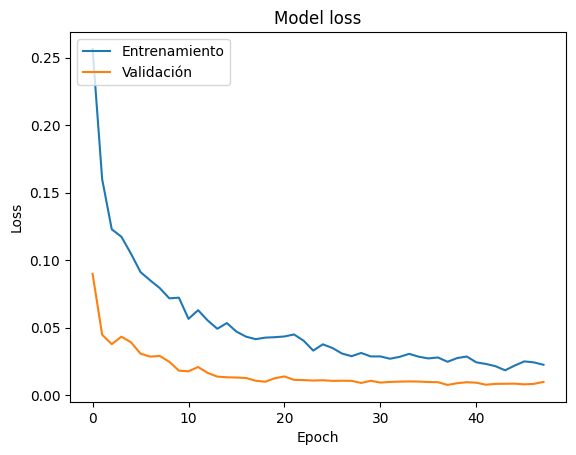

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Entrenamiento', 'Validación'], loc='upper left')
plt.show()

In [ ]:
y_pred_Early = model.predict(X_val)
mae_early = mean_absolute_error(Y_val, y_pred_Early)
mse_early = mean_squared_error(Y_val, y_pred_Early)

MAE['mae_early'] = mae_early
MSE['mse_early']= mse_early 

# Imprimir las métricas
print("Error absoluto medio (MAE):", mae_early)
print("Error cuadrático medio (MSE):", mse_early)


2/2 [==============================] - 0s 4ms/step
Error absoluto medio (MAE): 0.08598549058702255
Error cuadrático medio (MSE): 0.009750094562965788


#Observaciones

Modelo de varias capas con Early Stop y Dropout:

- Se definió un epoch de 60, se utilizó un Early Stop para una parada temprana que es una forma de regularización utilizada para evitar el sobreajuste cuando se entrena un modelo con un número de épocas iterativo. Esencialmente, deja de entrenar el modelo cuando una cantidad monitoreada deja de mejorar. En este caso, se está monitoreando 'val_loss', que es la pérdida de validación del modelo

- El parámetro patience=10 significa que el entrenamiento se detendrá si la cantidad monitoreada (en este caso, 'val_loss') no mejora después de 10 épocas

- Al colocar el parámetro Early Stop hace una parada tempara en la época 55 en donde ya según el parámetro deja de mejorar

- Un Dropout del 20% para evitar el sobreajuste

- La Función de pérdida definida fue mean_squared_error adecuada para problemas de regresión y el optimizador ADA (Adaptive Moment Estimation)que estima una tasa de aprendizaje adaptativa separada para cada parámetro y actualiza los pesos del modelo en función del gradiente de los datos de entrenamiento. 

Observaciones:

- La curva de validación no muestra una tendencia de crecer, después de alcanzar el mínimo, este comportamiento se puede tomar como ausencia de sobreajuste

- Con respecto al error El error absoluto medio (MAE) y el error cuadrático medio (MSE), y teniendo en cuenta la variable de predicción ("Probabilidad de admisión de un estudiante"), estos resultados se consideran son bajos sin embargo comparado con los demás modelos es el de más bajo resultado

## Punto 4 - Comparación y análisis de resultados

En la celda 4 comparen los resultados obtenidos de las diferentes redes y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

# Conclusiones:

1. **Rendimiento del modelo**: Según las métricas de error absoluto medio (MAE) y error cuadrático medio (MSE), el primer modelo de una red neuronal de una sola capa es el que mejor rendimiento ha tenido. Su MAE es el más bajo, lo que significa que, en promedio, sus predicciones se desvían menos del valor verdadero. Su MSE también es el más bajo, lo que indica que el modelo ha conseguido minimizar los errores cuadrados en sus predicciones. **Esto sugiere que el primer modelo es más preciso y fiable**

2. **Complejidad del modelo**: Aunque el segundo y tercer modelo son más complejos (tienen más capas y/o neuronas), no necesariamente ofrecen un mejor rendimiento. Esto puede ser un ejemplo de "sobreajuste", donde los modelos más complejos se adaptan tan bien a los datos de entrenamiento que no generalizan bien a nuevos datos. Esto puede ser especialmente cierto en el caso del tercer modelo, que tiene el MAE y MSE más altos a pesar de su complejidad y del uso de la técnica de regularización conocida como "Dropout"

3. **Eleccion del optimizador**: Observamos que el primer y tercer modelo usan diferentes optimizadores (SGD y Adam respectivamente). Aunque Adam suele ser más eficiente y rápido para converger en muchos casos, en esta situación, el modelo con SGD ha obtenido mejores resultados. Esto podría indicar que para este conjunto de datos específico y la arquitectura del modelo, SGD puede ser una mejor elección.

4. **Número de épocas**: Según los datos proporcionados, parece que un mayor número de épocas (60 en el primer y tercer modelo(con parada temprana en 55 épocas) vs. 50 en el segundo) no necesariamente lleva a un mejor rendimiento. De hecho, el primer modelo tuvo el mejor rendimiento con 60 épocas, pero el tercer modelo tuvo el peor rendimiento también con 55 épocas. Esto podría indicar que el número óptimo de épocas puede depender de otros factores, como la arquitectura del modelo y los datos de entrenamiento.

**En conclusión**: los resultados sugieren que un modelo más simple con SGD(Descenso de Gradiente Estocástico) como optimizador y con una función de pérdida de 'mean_squared_error' puede ser suficiente para este problema de regresión específico.

###*Ventajas del mejor modelo y las desventajas del modelo con el menor desempeño*

**Modelo con el mejor rendimiento (Primer modelo red neuronal de una sola capa)**

**Ventajas:**

Simplicidad: Este modelo es el más simple de los tres, con solo una capa. La simplicidad puede ser una ventaja ya que un modelo más simple a menudo es más fácil de interpretar y menos propenso a sobreajustar los datos de entrenamiento

Rendimiento: Este modelo tuvo el error absoluto medio (MAE) y el error cuadrático medio (MSE) más bajos, lo que indica que en promedio, sus predicciones estaban más cerca de los valores reales

Eficiencia: Dado que el modelo es más simple, es probable que sea más eficiente en términos de uso de recursos computacionales y tiempo de entrenamiento

**Desventajas:**

Capacidad limitada: Dada su simplicidad, este modelo puede no ser capaz de capturar relaciones complejas en los datos. Si el problema o los datos se vuelven más complejos, es posible que este modelo no pueda mantener su rendimiento


**Modelo con el menor rendimiento (Tercer modelo Early Stop y Dropout)**

**Ventajas:**

Complejidad: Este modelo es más complejo, con más capas y neuronas. Esto podría permitirle capturar relaciones más complejas en los datos

Regularización: Este modelo utiliza Dropout, una técnica de regularización que puede ayudar a prevenir el sobreajuste. También usa parada temprana, lo que puede hacer que el entrenamiento sea más eficiente al detenerse cuando ya no se observan mejoras

**Desventajas:**

Rendimiento: Este modelo tuvo el MAE y MSE más altos, lo que indica que sus predicciones, en promedio, estaban más lejos de los valores reales. Esto sugiere que el modelo puede no ser tan preciso o fiable

Sobreajuste: A pesar del uso de Dropout y parada temprana, este modelo puede haber sufrido de sobreajuste. Esto podría ser la razón por la cual, a pesar de su mayor complejidad, no logró un mejor rendimiento

Eficiencia: Dado que este modelo es más complejo, es probable que sea menos eficiente en términos de uso de recursos computacionales y tiempo de entrenamiento en comparación con el modelo más simple



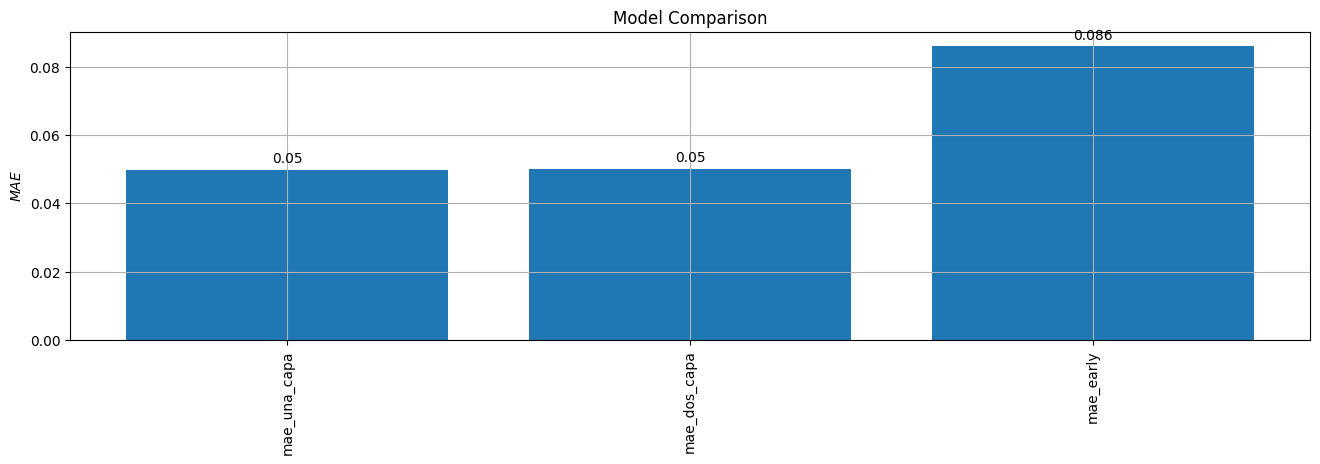

In [ ]:
# Celda 4

plt.figure(figsize=(16,4))
plt.bar(MAE.keys(),MAE.values() )
plt.ylabel('$MAE$')
plt.title('Model Comparison')
plt.grid()
  
def add_labels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]+ 0.002, round(y[i],3), ha = 'center')
        plt.xticks(rotation=90)

add_labels(MAE.keys(),list(MAE.values()))

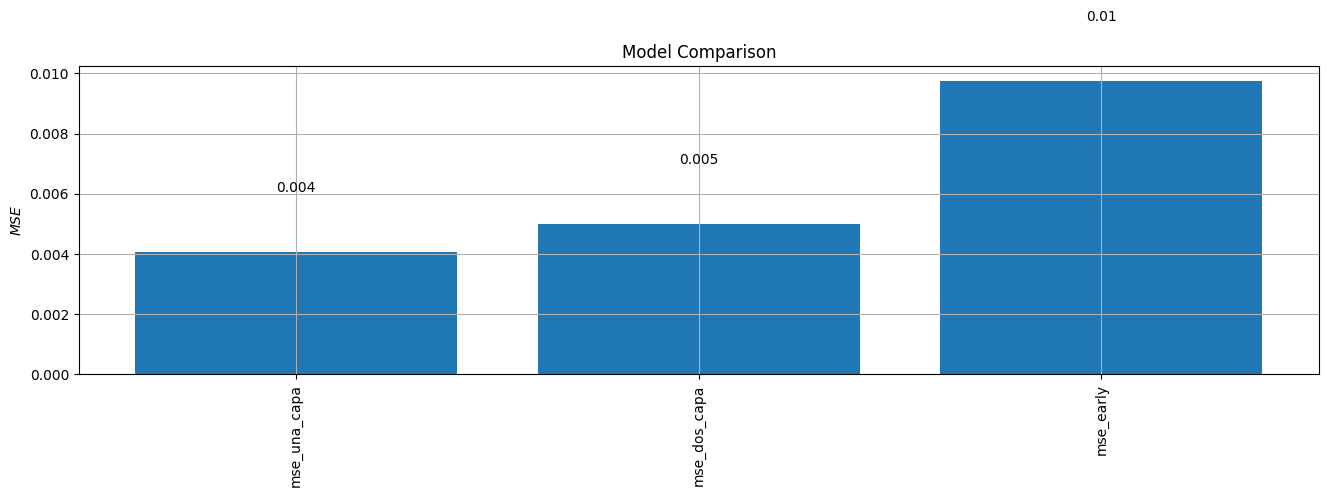

In [ ]:

plt.figure(figsize=(16,4))
plt.bar(MSE.keys(),MSE.values() )
plt.ylabel('$MSE$')
plt.title('Model Comparison')
plt.grid()
  
def add_labels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]+ 0.002, round(y[i],3), ha = 'center')
        plt.xticks(rotation=90)

add_labels(MSE.keys(),list(MSE.values()))